# GLM - Exercises

#### Exercise 1

Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5, 10, 20, 40, 80, 160, 320, 640). Compute the Pearson correlation between true and estimated receptive fields for each duration to quantify the accuracy of the (ML) estimator.

As the response generation process is stochastic, compute the average across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true receptive field?
_____


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def simulate_linear_response(duration, dt=0.1, std_dev=1, vf_size = (15,15)):

    # CONSTRUCT THE DESIGN MATRIX
    n_bins = int(duration / dt)
    S = std_dev * np.random.randn(n_bins, vf_size[0], vf_size[1])
    
    # CONSTRUCT THE FILTER - GROUND TRUTH
    mu, sigma = (8,8), (4,4)
    angle, phase, frequency = 45, 0, 0.085
    
    xx, yy = np.meshgrid(1 + np.arange(vf_size[0]), 1 + np.arange(vf_size[1]))
    # Gaussian envelope
    G = np.exp( -(xx - mu[0])**2 / (2 * sigma[0]) - (yy - mu[1])**2 / (2 * sigma[1]))
    # Spatial modulation
    phi = np.deg2rad(angle)
    xxr = xx * np.cos(phi)
    yyr = yy * np.sin(phi)
    xyr = (xxr + yyr) * (2 * np.pi) * 2 * frequency
    Sn = np.cos(xyr + phase)

    K = G * Sn
    K /= np.max(np.abs(K))

    # SIMULATE NEURON'S RESPONSE
    noise_variance, offset = 1, 2
    
    K_flat = K.ravel()                   
    K_flat = np.hstack((K.flat, offset)) 

    S_flat = S.reshape(S.shape[0], S.shape[1] * S.shape[2]) 
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))       

    ks = K_flat @ S_flat.T    
    r = ks                   
    r = r + np.sqrt(noise_variance) * np.random.randn(n_bins)

    return r, S_flat, vf_size, K

def reconstruct_filter(r, S_flat, vf_size):
    K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ r)
    K_hat = K_hat[:-1].reshape(vf_size)
    return K_hat

def pearson_correlation(k, k_estimate):
    k_flat, k_estimate_flat = k.ravel(), k_estimate.ravel()
    pc = (np.inner(k_flat, k_estimate_flat)) / (np.linalg.norm(k_flat) * np.linalg.norm(k_estimate_flat))
    return pc

In [12]:
durations1 = np.arange(10,300,50)
durations2 = np.arange(300, 600, 1)
durations = np.concatenate((durations1, durations2))
trials_per_duration = 10

for i, duration in enumerate(durations):
    pearsons = np.zeros((len(durations), trials_per_duration))
    
    for trial in range(trials_per_duration):
        r, S_flat, vf_size, K = simulate_linear_response(duration)
        K_estimate = reconstruct_filter(r, S_flat, vf_size)
        pearsons[i, trial] = pearson_correlation(K, K_estimate)

avg_pearsons = np.mean(pearsons, axis = 1)

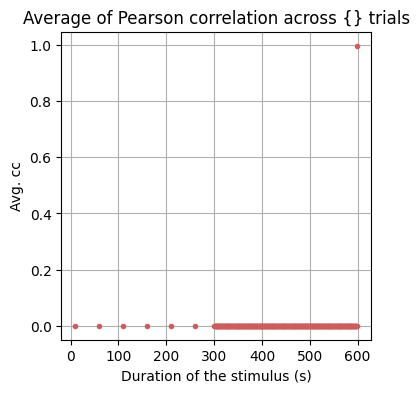

In [14]:
# PLOT
plt.figure(figsize=(4,4))
plt.title('Average of Pearson correlation across {} trials')
plt.plot(durations, avg_pearsons, '.', color='indianred')
plt.xlabel('Duration of the stimulus (s)')
#plt.xscale('log')
plt.ylabel('Avg. cc')
plt.grid()

In [4]:
daniela= np.array([[1,2,3],[1,2,3],[1,2,3]])
np.mean(daniela, axis=0)

array([1., 2., 3.])